In [ ]:
!gdown --id 1acnZbo5FCr9vRQEGgWkSfgEqM7AkoKQz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1acnZbo5FCr9vRQEGgWkSfgEqM7AkoKQz
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 222kB/s]


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vishakhdapat/customer-segmentation-clustering

!unzip customer-segmentation-clustering.zip

Dataset URL: https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering
License(s): apache-2.0
customer-segmentation-clustering.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-segmentation-clustering.zip
replace customer_segmentation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customer_segmentation.csv  


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


In [ ]:
data = pd.read_csv('customer_segmentation.csv')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### 1. Find Customer segments using K-means clustering algorithm

In [ ]:
kmeans_features = ['Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','NumWebVisitsMonth']

In [ ]:
X = data[kmeans_features]

In [ ]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [ ]:
wcss = []
K_values = range(1,11)

In [ ]:
for k in K_values:
  kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(X_s)
  wcss.append(kmeans.inertia_)

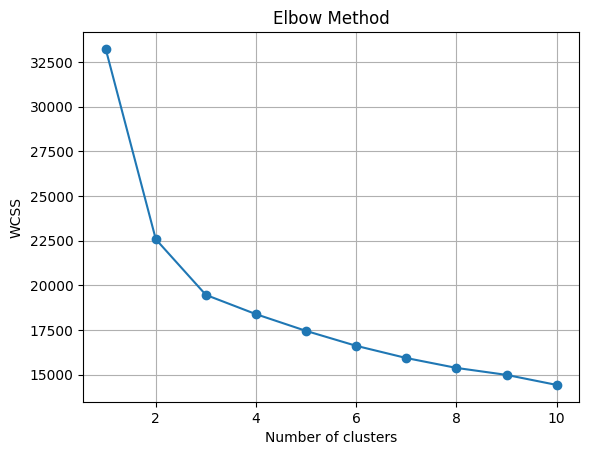

In [ ]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [ ]:
model = KMeans(n_clusters=2)
model.fit(X_s)

KMeans(n_clusters=2)

In [ ]:
Y = model.predict(X_s)

In [ ]:
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [ ]:
sil_score = silhouette_score(X_s,Y)

In [ ]:
sil_score

np.float64(0.32086600206199417)

 ### 2. Find Customer segments using DBSCAN algorithm

In [ ]:
dbscan_features = ['Income','Recency','MntWines','NumStorePurchases','NumWebPurchases','MntMeatProducts','NumWebVisitsMonth']

In [ ]:
X_d = data[db_sc]

In [ ]:
scaler = StandardScaler()
dbx = scaler.fit_transform(X_d)

In [ ]:
k=14
nei = NearestNeighbors(n_neighbors=k)
nei_f = nei.fit(dbx)
distances, _ = nei_f.kneighbors(dbx)

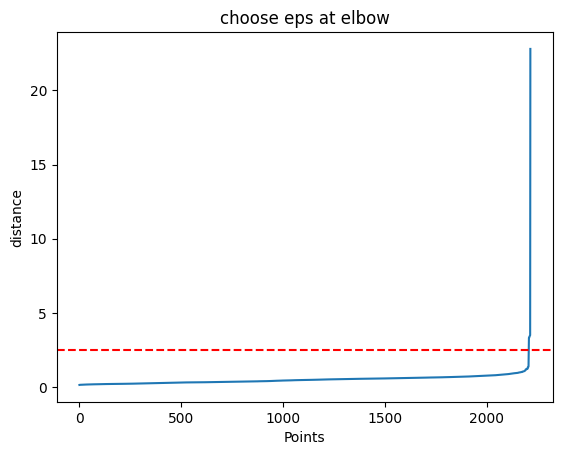

In [ ]:
k_distances = np.sort(distances[:, k-1])

plt.plot(k_distances)
plt.axhline(y=2.5, color='red', linestyle='--')
plt.xlabel('Points')
plt.ylabel('distance')
plt.title('choose eps at elbow')
plt.show()

In [ ]:
db = DBSCAN(eps=2.5,min_samples=14)
pred = db.fit_predict(dbx)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
db_score = silhouette_score(dbx,pred)

In [ ]:
db_score

np.float64(0.7488681261538874)

In [ ]:
noise_ratio = (pred == -1).mean()
print(noise_ratio)


0.0018050541516245488


### 3. Compare the Clusters and conclude your analysis

--> DBSCAN high silhouette score 0.74 is misleading because it grouped almost all data into a single dense cluster.

--> The very low noise ratio 0.18 indicates uniform data density rather than meaningful cluster separation.

--> DBSCAN is not suitable for segmentation in this dataset.

--> K-Means achieved a lower silhouette score 0.32, which is typical for real-world data.It is identified multiple interpretable clusters, revealing global structure in the data.

--> K-Means is the more appropriate algorithm for clustering and segmentation in this case.